In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
from pathlib import Path
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
%matplotlib inline

In [2]:
# Load CSVs
books_path = Path('Resources/books_cleaned.csv')
ratings_path = Path('Resources/ratings_cleaned.csv')
users_path = Path('Resources/users_cleaned.csv')
books_df = pd.read_csv(books_path, index_col=0)
ratings_df = pd.read_csv(ratings_path, index_col=0)
users_df = pd.read_csv(users_path, index_col=0)

In [3]:
# Check head
#ratings_df.set_index('User-ID', inplace=True)
ratings_df.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [4]:
# Drop Image-URL columns since they do not add value for recommendation system
books_df.drop(books_df.iloc[:, 5:8], inplace=True, axis=1)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
# Check head
#users_df.set_index('User-ID', inplace=True)
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [6]:
# Merge users_df with ratings_df
user_ratings_df = pd.merge(users_df, ratings_df, on='User-ID')

In [7]:
# Check head
user_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,8,"timmins, ontario, canada",34,0002005018,5
1,8,"timmins, ontario, canada",34,074322678X,5
2,8,"timmins, ontario, canada",34,0887841740,5
3,8,"timmins, ontario, canada",34,1552041778,5
4,8,"timmins, ontario, canada",34,1567407781,6


In [8]:
# Merge user_ratings_df with books_df
books_user_ratings_df = pd.merge(user_ratings_df, books_df, on='ISBN')

In [9]:
# Check head
books_user_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,116866,"ottawa, ,",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,123629,"kingston, ontario, canada",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,200273,"comber, ontario, canada",34,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [10]:
# Check tail
books_user_ratings_df.tail()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
376889,278851,"dallas, texas, usa",33,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
376890,278851,"dallas, texas, usa",33,0789721260,5,WebClasses From Scratch,Jesse Liberty,1999,Que
376891,278851,"dallas, texas, usa",33,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
376892,278851,"dallas, texas, usa",33,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books
376893,278851,"dallas, texas, usa",33,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation


In [11]:
# users_df.set_index('User-ID', inplace=True)
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [12]:
type(users_df.at[2, 'Age'])

numpy.int64

# Exploratory Data Analysis

In [13]:
# Store total # of books, ratings and users in variables
n_books = len(books_df.index.unique())
n_ratings = len(ratings_df)
n_users = len(users_df.index.unique())

In [14]:
# Print count and average ratings per DataFrame
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 433671
Number of unique books: 271360
Number of unique users: 278847
Average ratings per user: 1.56
Average ratings per book: 1.6


In [15]:
# Sort book titles with highest ratings
books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)

Book-Title
Minima Moralia: Reflections from Damaged Life                        10.0
Paralympics: Where Heroes Come                                       10.0
Celtic Knotwork Handbook                                             10.0
Celtic Knotwork                                                      10.0
Celtic Iron-On Transfer Patterns (Iron-On Transfers)                 10.0
                                                                     ... 
Die Stimmen von Salem.                                                1.0
Raising Positive Kids in a Negative World                             1.0
Potemkin Cola (Ossigeno)                                              1.0
City in Which I Love You: Poems (American Poets Continuum, No 20)     1.0
Pocket Aristotle (Enriched Classics)                                  1.0
Name: Book-Rating, Length: 134374, dtype: float64

In [16]:
# Count # of ratings per book and sort values
ratings_data = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean())

In [17]:
# Count # of ratings per book and sort values
ratings_data['Ratings-Count'] = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].count())

In [18]:
# Rename column for Average-Rating
ratings_data.rename(columns = {'Book-Rating': 'Average-Rating'}, inplace=True)

In [19]:
# Check head
ratings_data.head()

,Average-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Dark Justice,10.000000,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857,7
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000,2


# The histogram below shows a high volume of ratiings in the 0-10 range, but this is hard to see. We have about 2500 ratings in total

/Users/tyesondemets/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ratings-Count', ylabel='Density'>

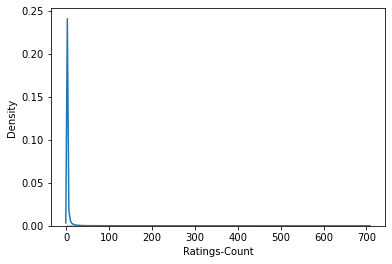

In [20]:
sns.distplot(ratings_data['Ratings-Count'], bins=1)

# The histogram below provides greater insight into the distribution of ratings count per rating score. There is extreme density at the 0 rating and peaks shown at 4 through 10 meaning that there are an extremely high number of books that are scored 0.

/Users/tyesondemets/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average-Rating', ylabel='Density'>

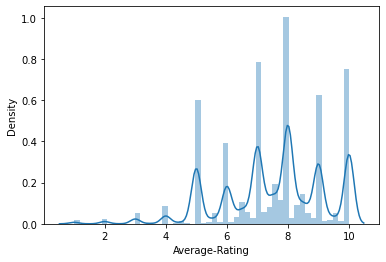

In [21]:
sns.distplot(ratings_data['Average-Rating'])

# The joint plot below shows that most ratings are given for books in the 2 and 4 range with slowly diminishing volume of ratings at 5. Books that are scored a 0 don't have very many ratings, there are just a high number of books that are rated 0.

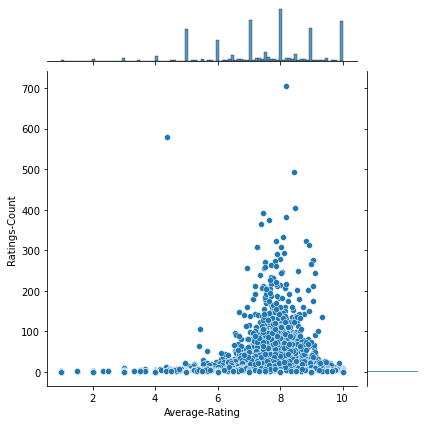

In [22]:
sns.jointplot(x = ratings_data['Average-Rating'], y = ratings_data['Ratings-Count'])

In [23]:
# Does not work due to Kernel crash
#ratings_matrix = books_user_ratings_df.pivot(index='User-ID',columns='Book-Title',values='Book-Rating')

#brave_new_world_user_ratings = ratings_matrix['Brave New World']

#left_hand_of_darkness_user_ratings = ratings_matrix['Left Hand of Darkness']

In [24]:
books_user_ratings_df['Book-Title'].isin(['Brave New World']).sum()

120